In [281]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

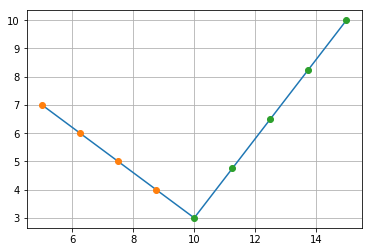

In [282]:
# отрезок (x0, y0) и (x1, y1)
# разбить его на n равных частей равномерно по длинне

x = [5., 10., 15]
y = [7., 3., 10]
n = 5

xn = np.linspace(x[0], x[1], n)[:-1]
yn = np.linspace(y[0], y[1], n)[:-1]

xn2 = np.linspace(x[1], x[2], n)
yn2 = np.linspace(y[1], y[2], n)

plt.grid(True)
plt.plot(x, y)
plt.plot(xn, yn, "o")
plt.plot(xn2, yn2, "o")

In [283]:
def splitBorder(nodes, splits, closed=False):
    if type(splits) == int:
        splits = [splits] * (nodes.shape[0] - 1)
    if len(splits) < nodes.shape[0] - 1:
        raise Exception('Size error!')
    
    xn = np.array([])
    yn = np.array([])

    for i in range(nodes.shape[0] - 1):
        xn = np.append(xn,
            np.linspace(nodes[i, 0], nodes[i+1, 0], splits[i] + 2)[:-1]
        )
        yn = np.append(yn,
            np.linspace(nodes[i, 1], nodes[i+1, 1], splits[i] + 2)[:-1]
        )

    if not closed:
        xn = np.append(xn, nodes[-1, 0])
        yn = np.append(yn, nodes[-1, 1])
 
    return np.array([xn, yn]).T

In [284]:
N = 25
#rnd.seed(1)
Nodes = rnd.rand(N, 2) * 10 

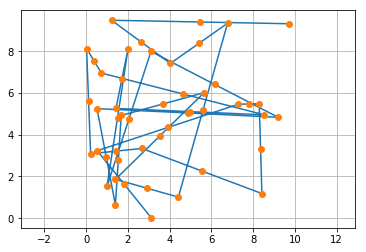

In [285]:
plt.grid(True)
plt.axis('equal')
plt.plot(Nodes[:,0], Nodes[:, 1])
points = splitBorder(Nodes, 1)
plt.plot(points[:,0], points[:,1], "o")

# Arc

In [286]:
def arc(r, a1, a2, n, center=[0,0]):
    a = np.radians(np.linspace(a1, a2, n + 2))
    x = (np.cos(a) - np.cos(np.radians(a1)))*r + center[0]
    y = (np.sin(a) - np.sin(np.radians(a1)))*r + center[1]
    return np.array([x, y]).T

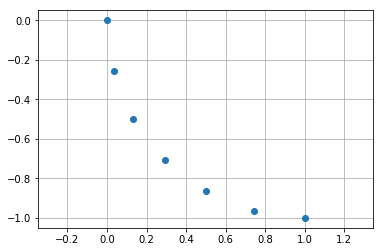

In [287]:
p = arc(1, 180, 270, 5)

plt.grid(True)
plt.axis('equal')
plt.plot(p[:,0], p[:,1], "o")

In [288]:
nnodes = np.array([[0, 0],
                  [-10, 0],
                  [-10, -4],
                  [12, -4],
                  [12, -2],
                  [2, -2]])

In [289]:
splited_nodes = splitBorder(nnodes, [20, 8, 40, 4, 20])
arc_nodes = arc(2, 270, 180, 7, center=nnodes[-1])

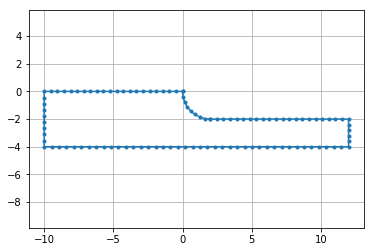

In [290]:
border = np.append(splited_nodes, arc_nodes).reshape(-1, 2)

plt.axis('equal')
plt.grid(True)
plt.plot(border[:, 0], border[:, 1], '.-')

In [291]:
def RemoveNearNodes(nodes, tolerance=0.01):
    new_nodes = nodes[0]
    for i in range(1, nodes.shape[0]):
        if np.linalg.norm(nodes[i] - nodes[i-1]) > tolerance:
            new_nodes = np.append(new_nodes, nodes[i])
            
    return new_nodes.reshape(-1, 2)

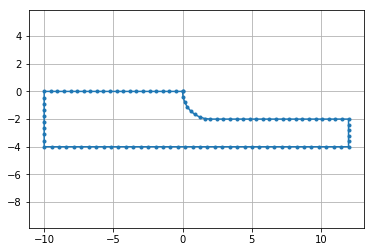

In [292]:
cleared_border = RemoveNearNodes(border, tolerance=0.15)

plt.axis('equal')
plt.grid(True)
plt.plot(cleared_border[:, 0], cleared_border[:, 1], '.-')

# Grid

((8, 45), (8, 45))

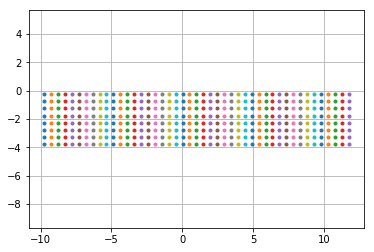

In [332]:
L1 = 10.0
L2 = 10.0
R = 2.0
H = 4.0
L = L1+R+L2
delta=0.25

l = np.linspace(delta, L-delta, 45)
h = np.linspace(delta, H-delta, 8)

X, Y = np.meshgrid(l, h)
X -= L1
Y -= H
plt.plot(X, Y, '.')
plt.axis('equal')
plt.grid(True)
X.shape, Y.shape

In [333]:
inner = np.vstack((X.ravel(), Y.ravel())).T
inner.shape

(360, 2)

In [334]:
delta2 = 0.25

In [335]:
mask1 = np.sum((inner - np.array([2.0, 0.0]))**2, axis=1) > (R+delta2)**2
mask2 = np.logical_not((inner[:, 0] > 2.0) & (inner[:, 1] > -2.0))

inner = inner[mask1 & mask2]

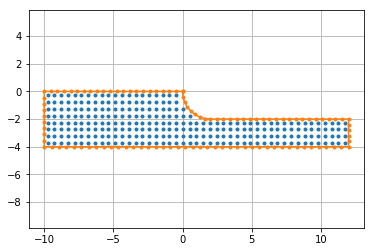

In [336]:
plt.plot(inner[:, 0], inner[:, 1], '.')
plt.plot(cleared_border[:, 0], cleared_border[:, 1], '.-')
plt.axis('equal')
plt.grid(True)

In [337]:
mesh = np.vstack((cleared_border, inner))

# Triangulation

In [338]:
import scipy.spatial

In [339]:
triangulation = scipy.spatial.Delaunay(mesh)

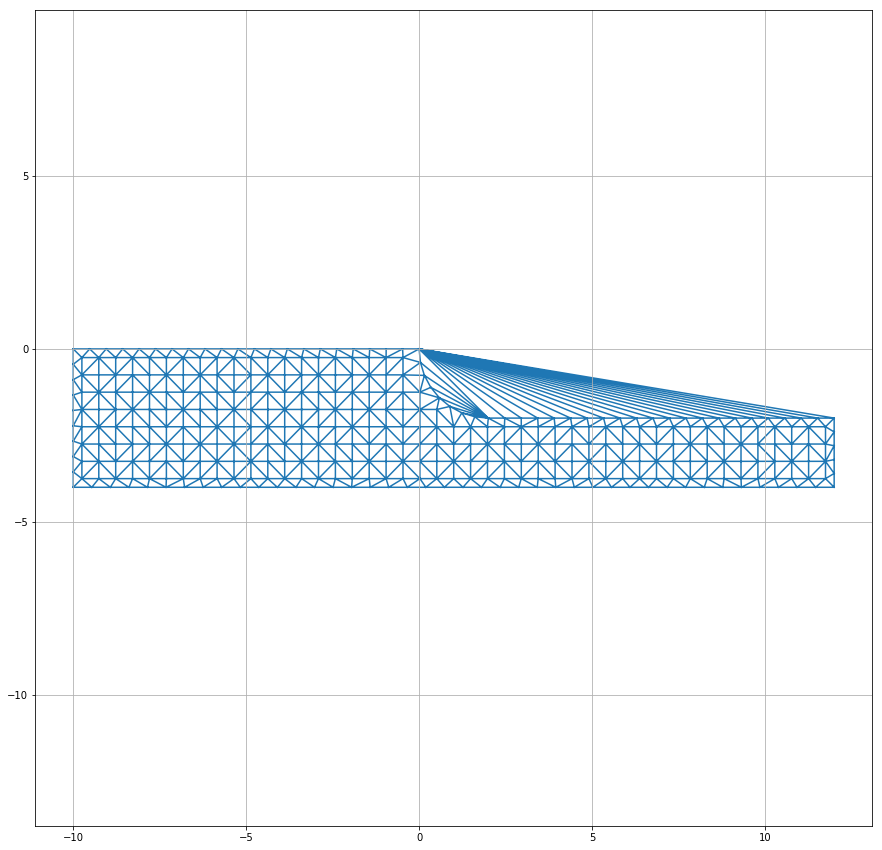

In [340]:
plt.figure(figsize=(15, 15))
plt.triplot(mesh[:, 0], mesh[:, 1], triangulation.simplices.copy())
plt.axis('equal')
plt.grid(True)

In [341]:
triangle_points = mesh[triangulation.simplices.copy()]

In [342]:
tri_x = triangle_points[:,:,0]
tri_y = triangle_points[:,:,1]

In [343]:
tri_x_mean = np.mean(tri_x, axis=1)
tri_y_mean = np.mean(tri_y, axis=1)

tri_centers = np.hstack((tri_x_mean.reshape(-1, 1), tri_y_mean.reshape(-1, 1)))

In [344]:
delta2 = 0.01
mask_tri1 = np.sum((tri_centers - np.array([2.0, 0.0]))**2, axis=1) > (R+delta2)**2
mask_tri2 = np.logical_not((tri_centers[:, 0] > 2.0) & (tri_centers[:, 1] > -2.0))


In [345]:
simplices = triangulation.simplices.copy()
simplices = simplices[mask_tri1 & mask_tri2]

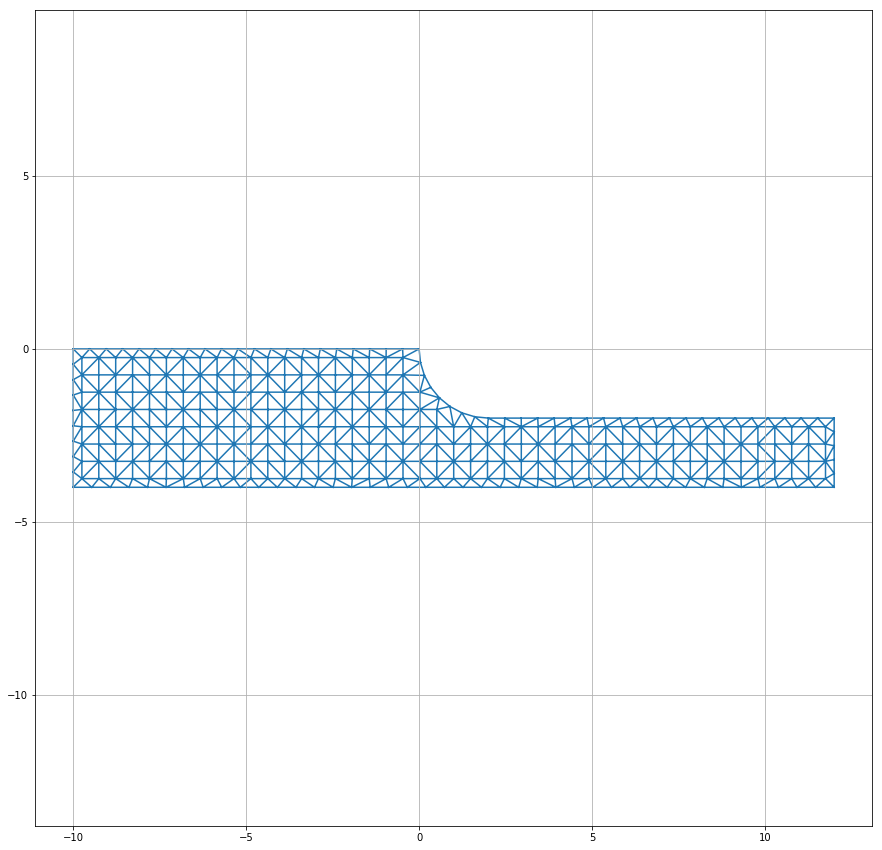

In [349]:
plt.figure(figsize=(15, 15))
plt.axis('equal')
plt.grid(True)
plt.triplot(mesh[:, 0], mesh[:, 1], simplices)

# Area

In [350]:
def triarea(a, b, c):
    ab = b - a
    ac = c - a
    return 0.5 * (ab[:,0]*ac[:,1] - ab[:,1]*ac[:,0])

# Constatnts

In [351]:
# Модуль Юнга
E = 2e7 # Н/см^2
mu = 0.25 # коэффициент Ламэ, безразмерный
t = 0.5 # cm
p = 44e3 # Н/см^2

In [352]:
D = E / (1 - mu**2)*np.array([[1,mu,0], [mu,1,0], [0,0,0.5*(1-mu)]])
D

array([[21333333.33333333,  5333333.33333333,        0.        ],
       [ 5333333.33333333, 21333333.33333333,        0.        ],
       [       0.        ,        0.        ,  8000000.        ]])

In [353]:
# B.T*D*B*t*A
BT = np.transpose(B, axes=(0,2,1))
BT.shape

NameError: name 'B' is not defined

In [354]:
B.shape

NameError: name 'B' is not defined

In [ ]:
# Матрица жесткостей для всех элементов
Ke = np.matmul(np.matmul(BT, D), B)*t*A.reshape(-1, 1, 1)
Ke.shape

#### Сборка матрицы жесткости с учетом зависимостей (элементы склеены по узлам)

$2n$ уравнений для вычисления перемещений всех узлов по двум степеням свободы;

Соответственно, результирующая матрица будт иметь размерность $2nX2n$ (???)

(`###` -- номер строки в матрице жесткости (номер глоб степени свободы))

| # узла (глобальный) | Ось | ### |
|---|---|---|
| 0 | $x$ 0| 0|
| 0 | $y$ 1| 1 |
| 1 | $x$ 0| 2 |
| 1 | $y$ 1| 3 |
| 2 | | 4 |
| 2 | | 5 |

Вычисление номеров строк в матрице для переещении по $x$

|# узла|###|
|---|---|
|0| 0|
|1 |2|
|2|4|

* for $i$ have $2i$ for $x$ axis
* for $i$ have $2i + 1$ for $y$ axis

EFT -- Element Freedom Table